A basic insurance analysis is done via a dataset having information about smokers and health insuarance charges. 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/ml_proj/insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.preprocessing import LabelEncoder


label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)


In [7]:
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

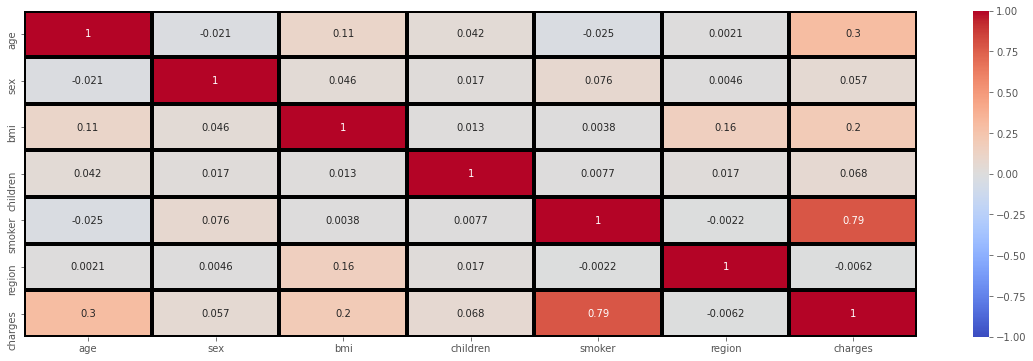

In [8]:
plt.figure(figsize=(20, 6))

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


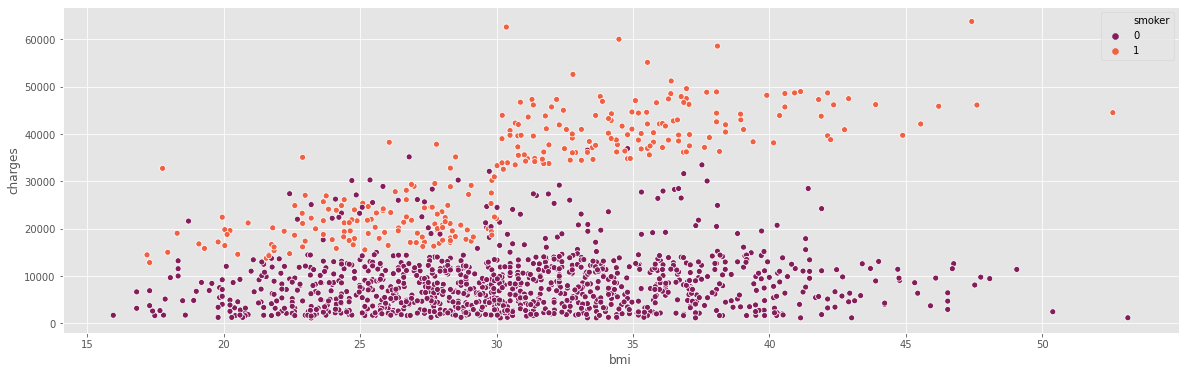

<Figure size 720x432 with 0 Axes>

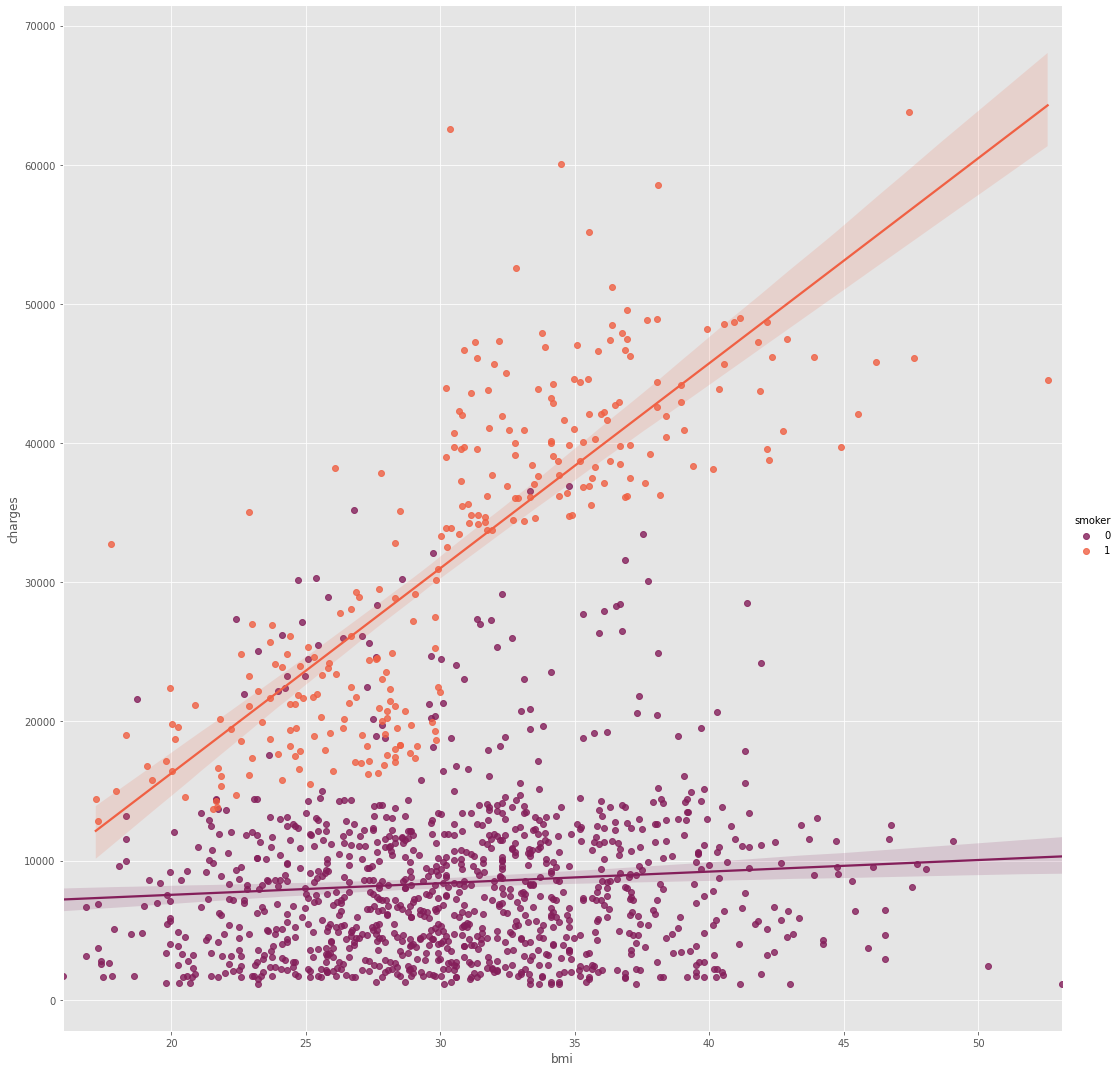

In [9]:
plt.figure(figsize=(20,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='rocket',hue='smoker')

plt.figure(figsize=(10,6))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'rocket', height=15)

In [10]:

X = df.drop(['charges'],axis=1)
y = df.charges

A graph with respect to bmi,age and charges is plotted. Also smoker is indicated. 

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
po.init_notebook_mode(connected=True)

fig = px.scatter_3d(df, x=X.bmi, y=X.age, z=y,
              color=X.smoker)
fig.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error


In [13]:
model2 = LinearRegression()

Different polynomial are attepted and according to the result quadratic regression would be the best choice for regression operation.

In [14]:
for i in range(1,5):
  poly = PolynomialFeatures(degree = i)
  x_poly = poly.fit_transform(X)

  X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_poly,y,test_size=0.25,random_state=42)
  model2.fit(X_tr2,y_tr2)
  
  y_pred = model2.predict(X_te2)
  print("Regression degree: {}, score: {}, mean_error:{}".format(i,model2.score(X_te2,y_te2), mean_squared_error(y_te2,y_pred)))
  


Regression degree: 1, score: 0.7668905583460907, mean_error:35174149.327053085
Regression degree: 2, score: 0.8563419718855164, mean_error:21676723.589904815
Regression degree: 3, score: 0.8508758355952588, mean_error:22501515.124522265
Regression degree: 4, score: 0.7610006684035329, mean_error:36062881.533220105


In [15]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)

X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_poly,y,test_size=0.25,random_state=42)
model2.fit(X_tr2,y_tr2)
  
y_pred = model2.predict(X_te2)
print("Regression degree: {}, score: {}, mean_error:{}".format(2,model2.score(X_te2,y_te2), mean_squared_error(y_te2,y_pred)))

Regression degree: 2, score: 0.8563419718855164, mean_error:21676723.589904815
